In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.__version__

'2.12.0'

In [ ]:
# !unzip '/content/drive/MyDrive/Classes/GFG/Sudoku_TFOD/cd.zip' -d '/content/drive/MyDrive/Classes/GFG/Sudoku_TFOD/dat'

Archive:  /content/drive/MyDrive/Classes/GFG/Sudoku_TFOD/cd.zip
replace /content/drive/MyDrive/Classes/GFG/Sudoku_TFOD/dat/cd/test_set/test_set/cats/cat.101.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip '/content/drive/MyDrive/Classes/GFG/Sudoku_TFOD/C&D.zip' -d '/content/drive/MyDrive/Classes/GFG/Sudoku_TFOD/data'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Classes/GFG/Sudoku_TFOD/data/train/dogs/dog.4419.jpg  
  inflating: /content/drive/MyDrive/Classes/GFG/Sudoku_TFOD/data/train/dogs/dog.442.jpg  
  inflating: /content/drive/MyDrive/Classes/GFG/Sudoku_TFOD/data/train/dogs/dog.4420.jpg  
  inflating: /content/drive/MyDrive/Classes/GFG/Sudoku_TFOD/data/train/dogs/dog.4421.jpg  
  inflating: /content/drive/MyDrive/Classes/GFG/Sudoku_TFOD/data/train/dogs/dog.4422.jpg  
  inflating: /content/drive/MyDrive/Classes/GFG/Sudoku_TFOD/data/train/dogs/dog.4424.jpg  
  inflating: /content/drive/MyDrive/Classes/GFG/Sudoku_TFOD/data/train/dogs/dog.4425.jpg  
  inflating: /content/drive/MyDrive/Classes/GFG/Sudoku_TFOD/data/train/dogs/dog.4426.jpg  
  inflating: /content/drive/MyDrive/Classes/GFG/Sudoku_TFOD/data/train/dogs/dog.4427.jpg  
  inflating: /content/drive/MyDrive/Classes/GFG/Sudoku_TFOD/data/train/dogs/dog.4431.jpg  
  inflating: /content/drive/MyDrive/Clas

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Classes/GFG/Sudoku_TFOD/data/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 20000 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Classes/GFG/Sudoku_TFOD/data/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5000 images belonging to 2 classes.


In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
625/625 [==============================] - 159s 252ms/step - loss: 0.6180 - accuracy: 0.6519 - val_loss: 0.5726 - val_accuracy: 0.7048
Epoch 2/10
625/625 [==============================] - 149s 239ms/step - loss: 0.5419 - accuracy: 0.7243 - val_loss: 0.4916 - val_accuracy: 0.7620
Epoch 3/10
625/625 [==============================] - 129s 207ms/step - loss: 0.4935 - accuracy: 0.7589 - val_loss: 0.4628 - val_accuracy: 0.7774
Epoch 4/10
625/625 [==============================] - 130s 209ms/step - loss: 0.4674 - accuracy: 0.7794 - val_loss: 0.4497 - val_accuracy: 0.7860
Epoch 5/10
625/625 [==============================] - 133s 213ms/step - loss: 0.4459 - accuracy: 0.7929 - val_loss: 0.4288 - val_accuracy: 0.8056
Epoch 6/10
625/625 [==============================] - 128s 206ms/step - loss: 0.4304 - accuracy: 0.7990 - val_loss: 0.4071 - val_accuracy: 0.8154
Epoch 7/10
625/625 [==============================] - 129s 207ms/step - loss: 0.4113 - accuracy: 0.8081 - val_loss: 0.4250 -

In [ ]:
!ls /content/drive/MyDrive/Classes/GFG/Sudoku_TFOD

 cd.zip     dat    object_detection_TF.ipynb   s2.jpg   S4.png
'C&D.zip'   data   S1.png		       S3.png


In [ ]:
%cd /content/drive/MyDrive/Classes/GFG/Sudoku_TFOD

/content/drive/MyDrive/Classes/GFG/Sudoku_TFOD


In [ ]:
!ls

 cd.zip     dat    object_detection_TF.ipynb   s2.jpg   S4.png
'C&D.zip'   data   S1.png		       S3.png


In [ ]:
cnn.save("TFOD.h5")

In [ ]:
cnn.save("Cd_model")

In [ ]:
test_image =load_img('/content/drive/MyDrive/Classes/GFG/Sudoku_TFOD/dat/cd/test_set/test_set/cats/cat.104.jpg', target_size = (64, 64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 30ms/step


In [ ]:
print(prediction)

cat


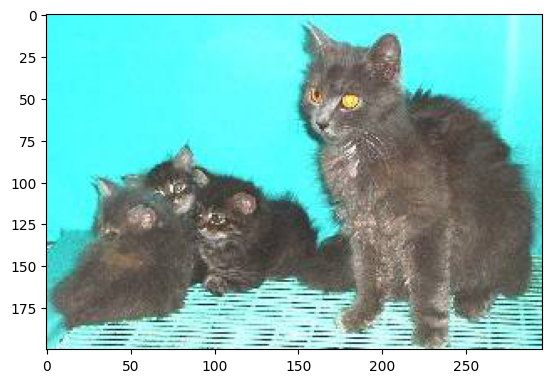

In [ ]:
import matplotlib.image as img
img1 = img.imread('/content/drive/MyDrive/Classes/GFG/Sudoku_TFOD/dat/cd/test_set/test_set/cats/cat.101.jpg')
plt.imshow(img1)
plt.show()